In [1]:
import torch 
from dataloader import ECG_Data, prepare_dataset
from resnet_1d import SERes1d
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [2]:
if torch.cuda.is_available():
    print("CUDA is available!")
    device = torch.device("cuda")  # Set device to GPU
else:
    print("CUDA is not available. Training on CPU.")
    device = torch.device("cpu")  # Set device to CPU

CUDA is not available. Training on CPU.


In [3]:
# final_data=prepare_dataset(".\\sample_dataset\\ptbxl_database.csv")
final_data=prepare_dataset(r"sample_dataset/ptbxl_database.csv")


    #split zrobiłem sklearnem bo po co się męczyć
ECG_train,ECG_test=train_test_split(final_data,test_size=0.2,random_state=42)

    #inaczej nie działa xd
ECG_train=ECG_train.reset_index()
ECG_test=ECG_test.reset_index()
    #tu ważne żeby podać ścieżkę do folderu z danymi, ale tylko folderu, bo potem to już się samo sklei
train_dataset=ECG_Data(ECG_train, r"sample_dataset/", augmentation_probability=0.5, noise_probability=0.5, noise_level=0.1)
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=2)
test_dataset=ECG_Data(ECG_test, r"sample_dataset/")
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size=2)

torch.Size([2, 12, 1000])


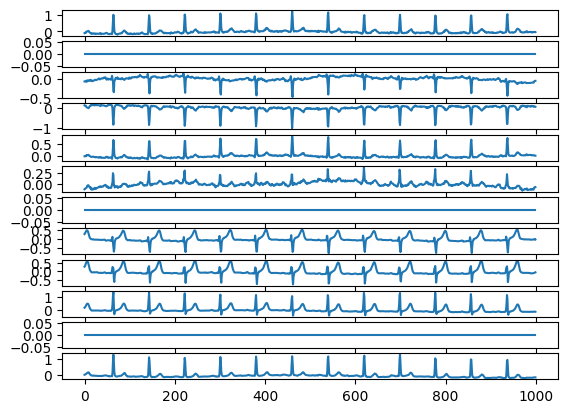

torch.Size([2])
torch.Size([2, 12, 1000])


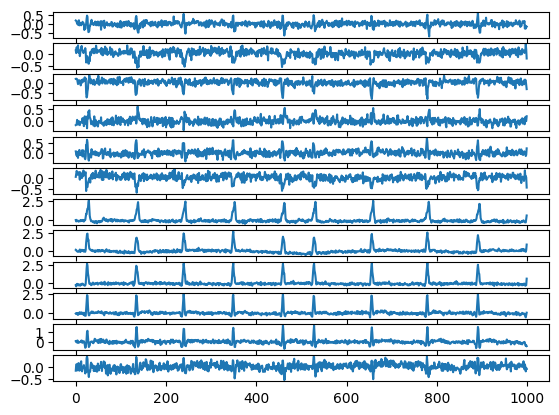

torch.Size([2])
torch.Size([2, 12, 1000])


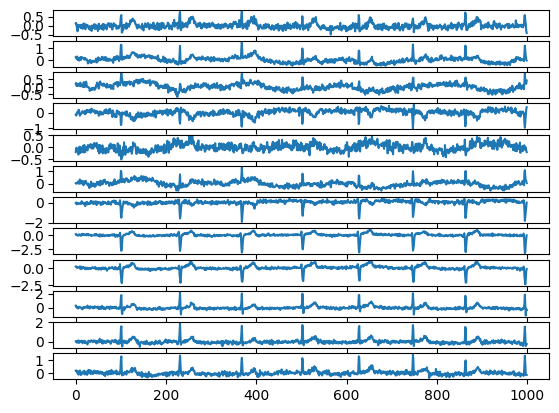

torch.Size([2])
torch.Size([2, 12, 1000])


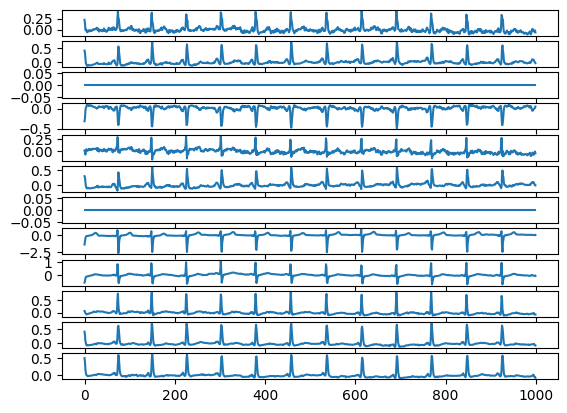

torch.Size([2])
torch.Size([2, 12, 1000])


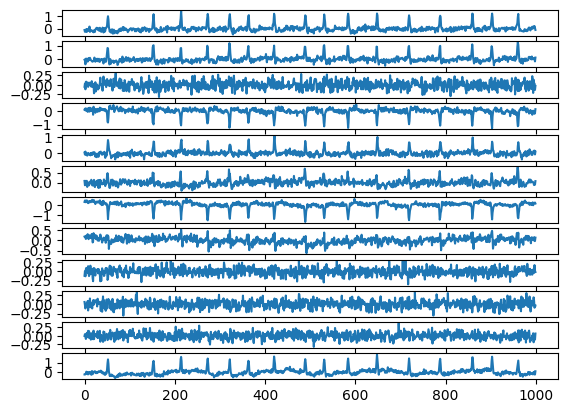

torch.Size([2])
torch.Size([1, 12, 1000])


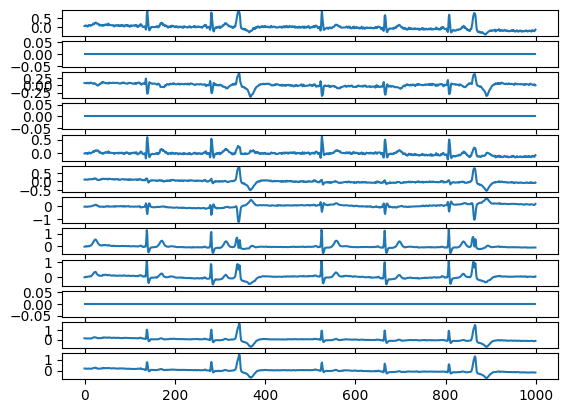

torch.Size([1])


In [4]:
for data, label in train_loader:
    print(data.shape)
    plt.subplots(12, 1)
    for i in range(12):
        plt.subplot(12, 1, i+1)
        plt.plot(data[0][i].detach().numpy())
    plt.show()
    print(label.shape)

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
model = SERes1d(12,5).to(device)


for data,label in test_loader:
    print(data.shape)
    out = model(data)
    print (label)
    print(out)
    



torch.Size([2, 12, 1000])
tensor([2, 2])
tensor([[ 0.3829, -0.3475, -0.0317, -0.0091, -0.0009],
        [ 0.1615, -0.4704, -0.0441, -0.0719,  0.1508]],
       grad_fn=<AddmmBackward0>)
torch.Size([1, 12, 1000])
tensor([0])
tensor([[ 0.2800, -0.3600, -0.0550, -0.0839,  0.0059]],
       grad_fn=<AddmmBackward0>)


In [7]:
import numpy as np
import time

In [8]:
model = SERes1d(12,5).to(device)

# create training loop 
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
losses = np.array([])
accuracies = np.array([])
for epoch in range(50):
    running_loss = 0.0
    train_acc = 0.0
    epoch_start = time.time()
    for data, label in train_loader:
        data = data.to(device)
        out = model(data)
        loss = criterion(out, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_acc += torch.sum(torch.sigmoid(out).argmax(dim=1) == label)
        #print("out",torch.sigmoid(out).argmax(dim=1))
        #print("target",label)
        #print(torch.sigmoid(out).argmax(dim=1) == label)
        running_loss += loss.item()*data.size(0)
    epoch_end = time.time()
    accuracies = np.append(accuracies,train_acc/len(train_loader.dataset))
    losses = np.append(losses, running_loss/len(train_loader.dataset))

    print(f"Epoch: {epoch}, Loss: {loss}, Time: {epoch_end-epoch_start}, Accuracy: {train_acc/len(train_loader.dataset)}")

Epoch: 0, Loss: 2.130328416824341, Time: 0.45914411544799805, Accuracy: 0.09090909361839294
Epoch: 1, Loss: 1.7402081489562988, Time: 0.4059875011444092, Accuracy: 0.1818181872367859
Epoch: 2, Loss: 1.3277363777160645, Time: 0.3882007598876953, Accuracy: 0.7272727489471436
Epoch: 3, Loss: 1.0924928188323975, Time: 0.3849368095397949, Accuracy: 0.8181818127632141
Epoch: 4, Loss: 0.8457507491111755, Time: 0.39907217025756836, Accuracy: 1.0
Epoch: 5, Loss: 0.7832713723182678, Time: 0.4060177803039551, Accuracy: 0.9090909361839294
Epoch: 6, Loss: 0.5748593807220459, Time: 0.3786900043487549, Accuracy: 0.8181818127632141
Epoch: 7, Loss: 0.4059979021549225, Time: 0.4382002353668213, Accuracy: 1.0
Epoch: 8, Loss: 0.3260887563228607, Time: 0.38275146484375, Accuracy: 1.0
Epoch: 9, Loss: 0.2666948735713959, Time: 0.3929758071899414, Accuracy: 1.0
Epoch: 10, Loss: 0.1676630973815918, Time: 0.4037971496582031, Accuracy: 1.0
Epoch: 11, Loss: 0.14061644673347473, Time: 0.3851950168609619, Accuracy:

In [9]:
import matplotlib.pyplot as plt

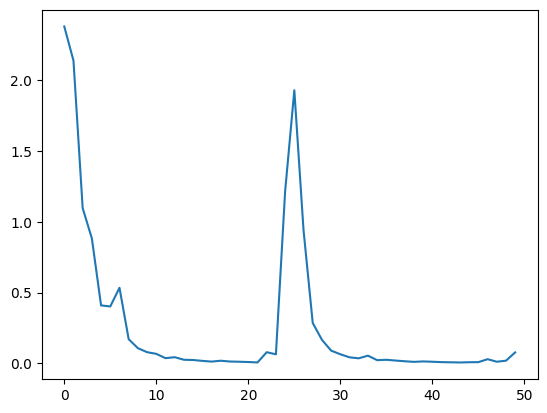

In [10]:
plt.plot(losses)

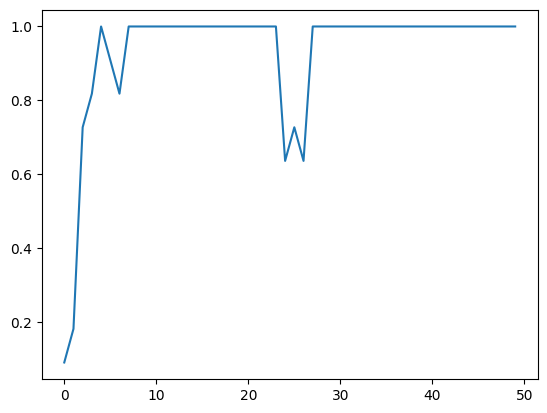

In [11]:
plt.plot(accuracies)